In [9]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, execute,  IBMQ, Aer
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [2]:
def create_bell_pair(qc, a, b):
    qc.h(a)
    qc.cx(a,b)

In [4]:
def encode_message(qc, qubit, msg):
    if msg=="00":
        pass
    elif msg == "10":
        qc.x(qubit)
    elif msg == "01":
        qc.z(qubit)
    elif msg == "11" :
        qc.x(qubit)
        qc.z(qubit)
    else :
        print("Invalid message")
        

In [5]:
def decode_message(qc,a,b):
    qc.cx(a,b)
    qc.h(a)

In [13]:
qc = QuantumCircuit(2)

create_bell_pair(qc,0,1)

qc.barrier()

msg="11"

encode_message(qc, 0, msg)

qc.barrier()

decode_message(qc,0,1)

qc.barrier()

qc.measure_all()

qc.draw()


┌───┐      ░ ┌───┐┌───┐ ░      ┌───┐ ░  ░ ┌─┐   
     q_0: |0>┤ H ├──■───░─┤ X ├┤ Z ├─░───■──┤ H ├─░──░─┤M├───
             └───┘┌─┴─┐ ░ └───┘└───┘ ░ ┌─┴─┐└───┘ ░  ░ └╥┘┌─┐
     q_1: |0>─────┤ X ├─░────────────░─┤ X ├──────░──░──╫─┤M├
                  └───┘ ░            ░ └───┘      ░  ░  ║ └╥┘
measure_0: 0 ═══════════════════════════════════════════╩══╬═
                                                           ║ 
measure_1: 0 ══════════════════════════════════════════════╩═

{'11': 1024}


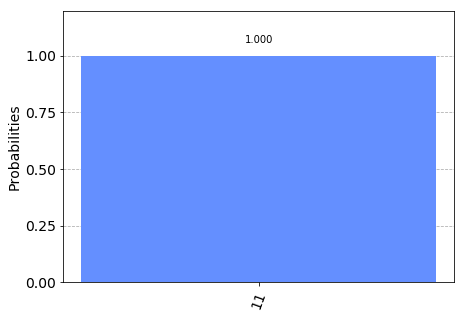

In [14]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
job_result = job_sim.result()

measurement_result = job_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)